In [1]:
import sys
#sys.path.insert(1, '/home/msantolaria/Documents/MyPythonLibrary/ClimAnag/')
sys.path.insert(1, '/home/msantola/SCRIPTS/ClimAnag/')
import climbasis as climb
from climbasis import *
import domain as dom
import numpy.ma as ma
import myplot
import glob

In [2]:
sourceDataO='/data/msantola/obs/esacci/'


In [3]:
#! ls /home/msantolaria/Documents/Data/ESACCI/

In [4]:
domain='PIR'
season='MAM'
iyr=1982
imon=1
fyr=2017
fmon=12
variable='snc'
units='%'

In [5]:
domain='PIR'
model='esacci'
fileName='snow.mon_esacci_0.5x0.5_1982-2018.nc'
ds= xr.open_dataset(sourceDataO+fileName)['scfg_interp_0.5deg_icefilled']
#ds

In [6]:
ds=dom.reversing_lat(ds)
#fieldYO=dom.field_dom(ds.sel(time=slice(str(iyr)+"-"+str(imon), str(fyr)+"-"+str(fmon))),domain)
field=dom.field_dom(ds,domain)
#fieldYO=fieldYO.sel(time=dsYO.time.dt.year.isin(range_years))
lat,lon=climb.latlon(field)
ylat=field.coords[lat]
xlon=field.coords[lon]



In [7]:
#field.sel(time='1991-1').plot(cmap='bwr')

In [8]:
vals,anoms=climb.seasonal_selection(field,season,iyr,fyr)
par=climb.trend_vect(vals.time,vals,'time') 
clim=vals.mean('time')
std=vals.std('time')

trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4


/home/msantola/.conda/envs/mariaenv/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/msantola/.conda/envs/mariaenv/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(0.5, 0.8, 'clim_snc_esacci_PIR_MAM_1982_2017')

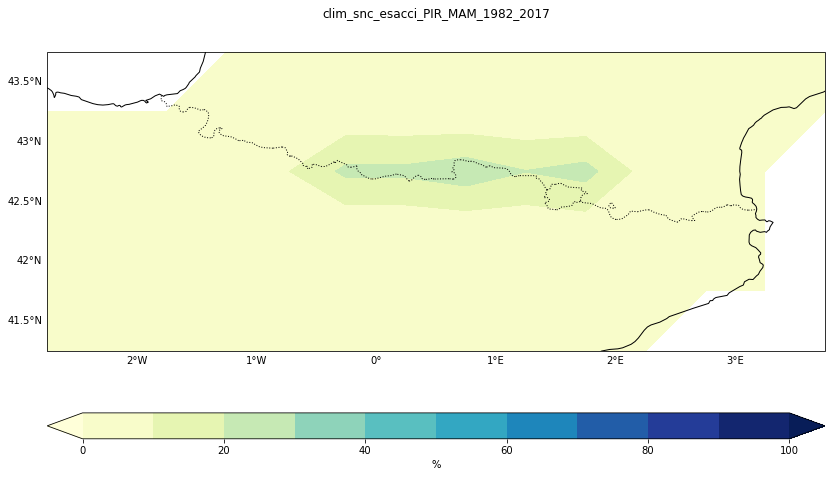

In [9]:
clevsClim=np.arange(0,110,10)
cmapClim='YlGnBu'
#
#Clim
##
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)

fig,axs= plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18,12))

lat,lon=climb.latlon(clim)
lons, lats = np.meshgrid(clim[lon] ,clim[lat])

CS1=axs.contourf(lons,lats, clim,clevsClim,
            transform=ccrs.PlateCarree(),
            cmap=cmapClim,extend='both')
# Draw the coastines for each subplot
axs.coastlines()
axs.add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=2, color='gray', alpha=0.0, linestyle='-')
gl.xlabels_top = False
gl.ylabels_right = False
gl.set_xlabel_style = {'color': 'black'}
gl.set_xlabel_style = {'color': 'black'}
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.35, top=0.8, left=0.20, right=0.80,
                wspace=0.05, hspace=0.5)
cbar_ax = fig.add_axes([0.2, 0.30, 0.6, 0.03])
ytitle=0.8
# Draw the colorbar
cbar=fig.colorbar(CS1, cax=cbar_ax,orientation='horizontal',label='%s'%(units))
## Add a big title at the top
ofileC='clim_'+variable+'_'+model+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
plt.suptitle(ofileC,y=ytitle)
#fig.savefig(plotsDir+ofileC+'.png',format='png',bbox_inches='tight')
#print('Figure save at ',plotsDir, 'as',ofileC)
#plt.show()
####

Text(0.5, 0.8, 'std_snc_esacci_PIR_MAM_1982_2017')

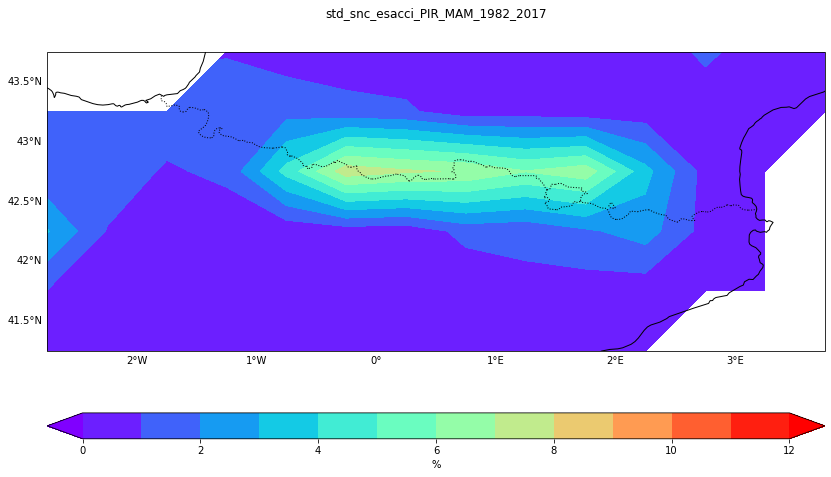

In [10]:
clevsStd=np.arange(0,13,1)
cmapStd='rainbow'
#
#Clim
##
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)

fig,axs= plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18,12))

lat,lon=climb.latlon(clim)
lons, lats = np.meshgrid(clim[lon] ,clim[lat])

CS1=axs.contourf(lons,lats,std,clevsStd,
            transform=ccrs.PlateCarree(),
            cmap=cmapStd,extend='both')
# Draw the coastines for each subplot
axs.coastlines()
axs.add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=2, color='gray', alpha=0.0, linestyle='-')
gl.xlabels_top = False
gl.ylabels_right = False
gl.set_xlabel_style = {'color': 'black'}
gl.set_xlabel_style = {'color': 'black'}
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.35, top=0.8, left=0.20, right=0.80,
                wspace=0.05, hspace=0.5)
cbar_ax = fig.add_axes([0.2, 0.30, 0.6, 0.03])
ytitle=0.8
# Draw the colorbar
cbar=fig.colorbar(CS1, cax=cbar_ax,orientation='horizontal',label='%s'%(units))
## Add a big title at the top
ofileC='std_'+variable+'_'+model+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
plt.suptitle(ofileC,y=ytitle)
#fig.savefig(plotsDir+ofileC+'.png',format='png',bbox_inches='tight')
#print('Figure save at ',plotsDir, 'as',ofileC)
#plt.show()
####

Text(0.5, 0.8, 'trend_snc_esacci_PIR_MAM_1982_2017')

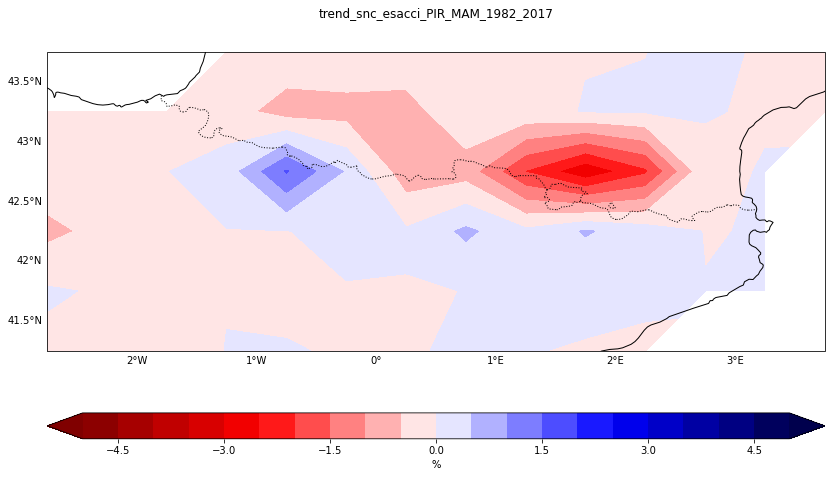

In [11]:
clevsPar=np.arange(-5,5.5,0.5)
cmapPar='seismic_r'
#
#Clim
##
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)

fig,axs= plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(18,12))

lat,lon=climb.latlon(clim)
lons, lats = np.meshgrid(clim[lon] ,clim[lat])

CS1=axs.contourf(lons,lats,10*par[0],clevsPar,
            transform=ccrs.PlateCarree(),
            cmap=cmapPar,extend='both')
# Draw the coastines for each subplot
axs.coastlines()
axs.add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=2, color='gray', alpha=0.0, linestyle='-')
gl.xlabels_top = False
gl.ylabels_right = False
gl.set_xlabel_style = {'color': 'black'}
gl.set_xlabel_style = {'color': 'black'}
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.35, top=0.8, left=0.20, right=0.80,
                wspace=0.05, hspace=0.5)
cbar_ax = fig.add_axes([0.2, 0.30, 0.6, 0.03])
ytitle=0.8
# Draw the colorbar
cbar=fig.colorbar(CS1, cax=cbar_ax,orientation='horizontal',label='%s'%(units))
## Add a big title at the top
ofileC='trend_'+variable+'_'+model+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
plt.suptitle(ofileC,y=ytitle)
#fig.savefig(plotsDir+ofileC+'.png',format='png',bbox_inches='tight')
#print('Figure save at ',plotsDir, 'as',ofileC)
#plt.show()
####

In [ ]:
xlon

In [ ]:
vals

In [ ]:
##Computing time series of seasonal spatial average ----------------------------
#print('Computing time series of seasonal spatial average')
ts_season=climb.spatial_average(vals)
#ts_season_det=climb.spatial_average(anoms_detrend)
#plotnameTs='timeseries_anoms_'+variable+'_'+model+'_'+exp+'_'+domain+'_'+season+'_'+str(iyr)+'-'+str(fyr)
#np.savetxt(resultsDir+plotnameTs+'.txt',ts_season)
#print('saving .txt at',resultsDir+plotnameTs)

#print('Computing time series of seasonal spatial average')
#ts_season_norm=climb.spatial_average(anoms_norm)


In [ ]:
##Trends---------------------------------------
xd=np.arange(0,len(ts_season),1)
par=stats.linregress(xd,ts_season)

fig, ax = plt.subplots(figsize=(12, 8))
my_ticks=xd+iyr
print(xd,my_ticks)
ticks=np.arange(iyr,fyr+1,1)
#ax.plot(xd,ts_season,color='b', linewidth=2)
ax.plot(xd, ts_season, 'b:')

#ax.set_ylim(0, 3)
ax.set_xlabel('Year')
ax.set_ylabel('%s'%(units))
#ax.set_title(plotnameTs)
freq=5
plt.xticks(xd,my_ticks, rotation='vertical')
plt.legend()
plt.show()
